# House Price Prediction
***
This case study is based on https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

In [207]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.model_selection import GridSearchCV

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

## 1. Sourcing and loading
### 1a. Load the data
The dataset from Kaggle has already been split into train and test

In [208]:
df_train = pd.read_csv("../data/train.csv")
df_test= pd.read_csv("../data/test.csv")

### 1b. Explore the data
The train dataset has one more column including the house sale price

In [209]:

print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [210]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [211]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [212]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [213]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


There are 38 numerical columns

## 2. Data Wrangling
### 2a. Check for "SalePrice" outliers

This part start from examining the column to be predicted, saleprice, through different plots. I will do preliminary investigation of the correlation between "saleprice" and different numerical features/columns. Confirmed outliers from this investigation will be dropped.  

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

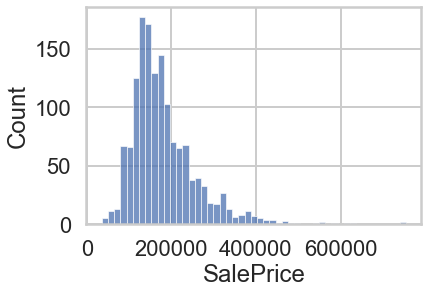

In [214]:
#plt.figure(figsize=(5,1),dpi=200)
#sns.set(font_scale=2)
sns.histplot(x=df_train['SalePrice'])


<AxesSubplot:xlabel='SalePrice'>

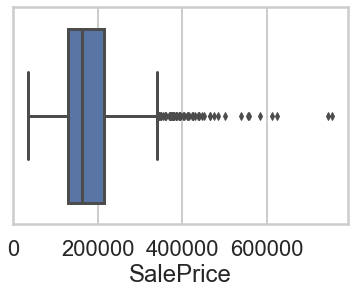

In [215]:
sns.boxplot(data=df_train,x='SalePrice')

In [216]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

As a rule of thumb, the box plot shows all data points outside of 1.5 inner quartile range as outliers. In this case, in the plot above, everything larger than 340037.5 is shown as outliers. 

For the purpose of building the relationship of predicting the house prices, extremely large or small sale prices are not necessarily outliers, as long as they are large or small for a reason. 

More investigations are performed below to see whether the extremely large values are outliers or not.


### 2b. Preliminary investigations of the correlations between the sale price and numerical features

In [217]:
df_train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

The top 3 features with a positive correlation with the "SalePrice" are 1) OverallQual: Rates the overall material and finish of the house; 2)GrLivArea: Above grade (ground) living area square feet; 3) GarageCars: Size of garage in car capacity

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

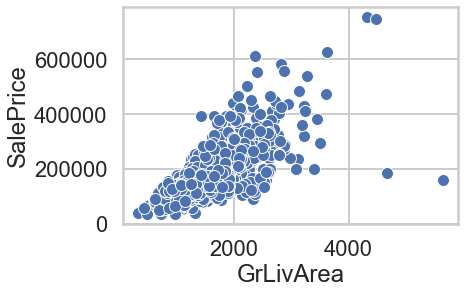

In [218]:
# A visulization of the correlation between 'GrLivArea' and 'SalePrice'
sns.scatterplot(x=df_train['GrLivArea'],y=df_train['SalePrice'])

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

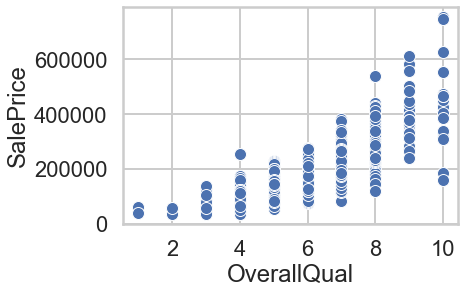

In [219]:
# A visulization of the correlation between 'OverallQual' and 'SalePrice'
sns.scatterplot(x=df_train['OverallQual'],y=df_train['SalePrice'])

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

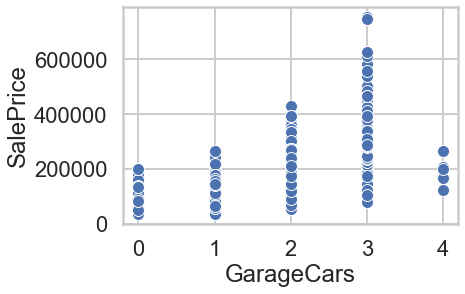

In [220]:
# A visulization of the correlation between 'GrLivArea' and 'SalePrice'
sns.scatterplot(x=df_train['GarageCars'],y=df_train['SalePrice'])

Overall, majority of the data points behave as expected on the scatter plots other than a couple of them look suspecious on each plot. on the GrLivArea plot, there are 2 points with a living area larger than 4000 sqft but sold less than 200000. On the OverallQual plot, there are 2 points with a quality score of 10 but sold less than $200000. 

At this stage, I do not recommend deleting any of these data points until further investigation. 

### 2c. Missing Data Investigation

In [221]:
# Combining train and test dataset 
df_main = pd.concat([df_train,df_test],ignore_index=True)

In [222]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [223]:
df_main['PoolArea'].value_counts()

0      2906
512       1
648       1
576       1
555       1
480       1
519       1
738       1
144       1
368       1
444       1
228       1
561       1
800       1
Name: PoolArea, dtype: int64

In [224]:
# Relative frequency of missing data
100 * df_main.isnull().sum() / len(df_main)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.034258
SaleCondition     0.000000
SalePrice        49.982871
Length: 81, dtype: float64

In [225]:
# Writing a function to find the frequency of missing data and sort, excluding 0 percentage of missing data
def percent_missing(df):
    percentage = 100 * df.isnull().sum() / len(df)
    percentage = percentage[percentage > 0]
    percentage = percentage.sort_values(ascending=False)
    return percentage

In [226]:
miss_data_perc = percent_missing(df_main)
miss_data_perc

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
SalePrice       49.982871
FireplaceQu     48.646797
LotFrontage     16.649538
GarageCond       5.447071
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageType       5.378554
BsmtExposure     2.809181
BsmtCond         2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
Functional       0.068517
BsmtHalfBath     0.068517
BsmtFullBath     0.068517
Utilities        0.068517
KitchenQual      0.034258
TotalBsmtSF      0.034258
BsmtUnfSF        0.034258
GarageCars       0.034258
GarageArea       0.034258
BsmtFinSF2       0.034258
BsmtFinSF1       0.034258
Exterior2nd      0.034258
Exterior1st      0.034258
SaleType         0.034258
Electrical       0.034258
dtype: float64

In [227]:
# filling missing basement numeric columns to 0
base_num_cols = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']
df_main[base_num_cols] = df_main[base_num_cols].fillna(0) 

# filling missing basement string columns to NA
base_str_cols = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
df_main[base_str_cols] = df_main[base_str_cols].fillna('None')


In [228]:
# The following codes deal with columns that are not supposed to have a NaN value. 
#df_main['MasVnrArea']=df_main['MasVnrArea'].fillna(0)

#df_main.loc[df_main['MasVnrType'] == some_value]

df_main['MasVnrType'] = df_main['MasVnrType'].fillna("None")

# Filling nan MasVnrArea with 0
df_main['MasVnrArea'] = df_main['MasVnrArea'].fillna(0)

In [229]:
# filling nan with most frequent values
df_main['MSZoning'] = df_main['MSZoning'].fillna(df_main['MSZoning'].value_counts().index[0])
df_main['Functional'] = df_main['Functional'].fillna(df_main['Functional'].value_counts().index[0])
df_main['Utilities'] = df_main['Utilities'].fillna(df_main['Utilities'].value_counts().index[0])

In [230]:
miss_data_perc = percent_missing(df_main)
miss_data_perc

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
SalePrice       49.982871
FireplaceQu     48.646797
LotFrontage     16.649538
GarageYrBlt      5.447071
GarageQual       5.447071
GarageCond       5.447071
GarageFinish     5.447071
GarageType       5.378554
KitchenQual      0.034258
GarageCars       0.034258
GarageArea       0.034258
Electrical       0.034258
Exterior2nd      0.034258
Exterior1st      0.034258
SaleType         0.034258
dtype: float64

In [231]:

# filling missing garage string columns to NA
gar_str_cols = ['GarageFinish','GarageQual','GarageCond','GarageType']
df_main[gar_str_cols] = df_main[gar_str_cols].fillna("NA")
# filling missing garage numeric columns to 0
df_main['GarageYrBlt'] = df_main['GarageYrBlt'].fillna(0)

In [232]:
miss_data_perc = percent_missing(df_main)
miss_data_perc

PoolQC         99.657417
MiscFeature    96.402878
Alley          93.216855
Fence          80.438506
SalePrice      49.982871
FireplaceQu    48.646797
LotFrontage    16.649538
Exterior1st     0.034258
Exterior2nd     0.034258
Electrical      0.034258
KitchenQual     0.034258
GarageCars      0.034258
GarageArea      0.034258
SaleType        0.034258
dtype: float64

In [233]:
not_available = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']
df_main[not_available] = df_main[not_available].fillna("NA")

In [234]:
miss_data_perc = percent_missing(df_main)
miss_data_perc

SalePrice      49.982871
LotFrontage    16.649538
Exterior1st     0.034258
Exterior2nd     0.034258
Electrical      0.034258
KitchenQual     0.034258
GarageCars      0.034258
GarageArea      0.034258
SaleType        0.034258
dtype: float64

<AxesSubplot:>

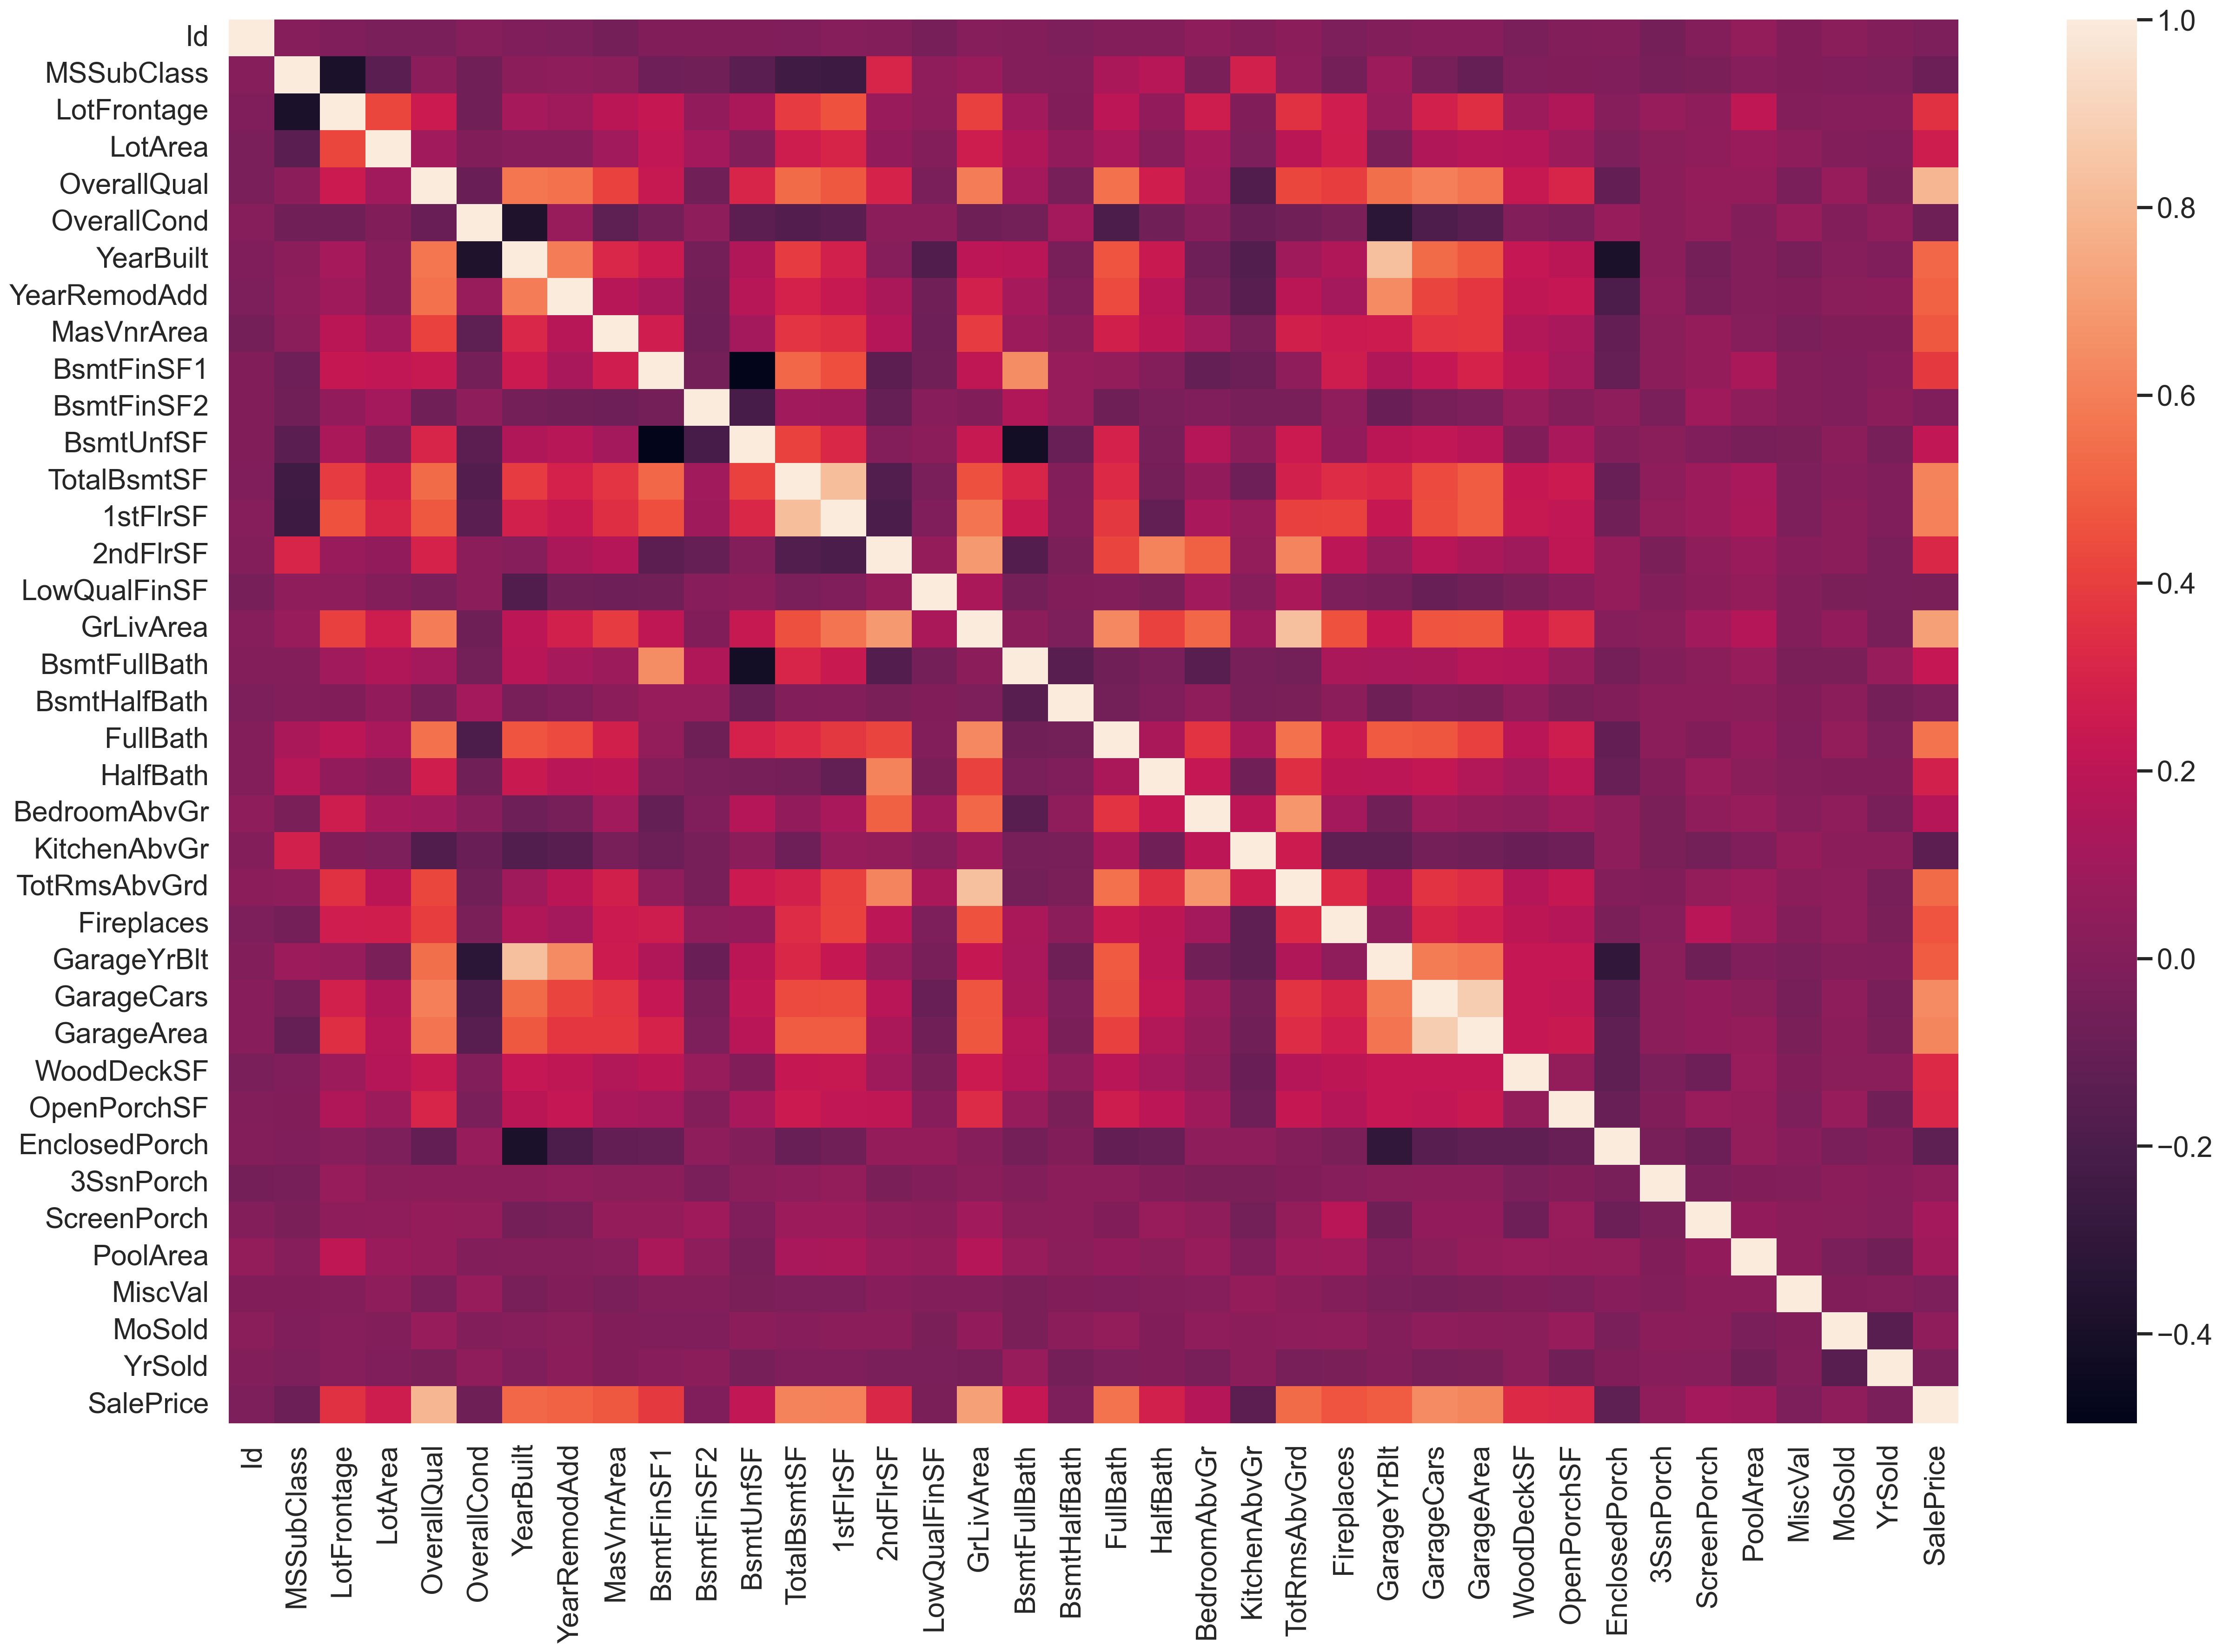

In [235]:
# What is LotFrontage correlated with? 
plt.figure(figsize=(30,20),dpi=200)
sns.heatmap(df_train.corr(),annot=False)

In [236]:
df_train.corr()['LotFrontage'].sort_values()

MSSubClass      -0.386347
OverallCond     -0.059213
Id              -0.010601
BsmtHalfBath    -0.007234
KitchenAbvGr    -0.006069
MiscVal          0.003368
YrSold           0.007450
EnclosedPorch    0.010700
MoSold           0.011200
LowQualFinSF     0.038469
ScreenPorch      0.041383
BsmtFinSF2       0.049900
HalfBath         0.053532
3SsnPorch        0.070029
GarageYrBlt      0.070250
2ndFlrSF         0.080177
WoodDeckSF       0.088521
YearRemodAdd     0.088866
BsmtFullBath     0.100949
YearBuilt        0.123349
BsmtUnfSF        0.132644
OpenPorchSF      0.151972
MasVnrArea       0.193458
FullBath         0.198769
PoolArea         0.206167
BsmtFinSF1       0.233633
OverallQual      0.251646
BedroomAbvGr     0.263170
Fireplaces       0.266639
GarageCars       0.285691
GarageArea       0.344997
SalePrice        0.351799
TotRmsAbvGrd     0.352096
TotalBsmtSF      0.392075
GrLivArea        0.402797
LotArea          0.426095
1stFlrSF         0.457181
LotFrontage      1.000000
Name: LotFro

<AxesSubplot:xlabel='LotArea', ylabel='LotFrontage'>

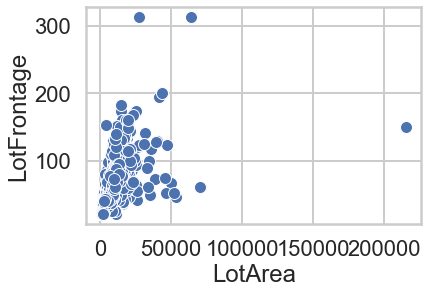

In [237]:
sns.scatterplot(x=df_main['LotArea'],y=df_main['LotFrontage'])

<AxesSubplot:xlabel='LotArea', ylabel='LotFrontage'>

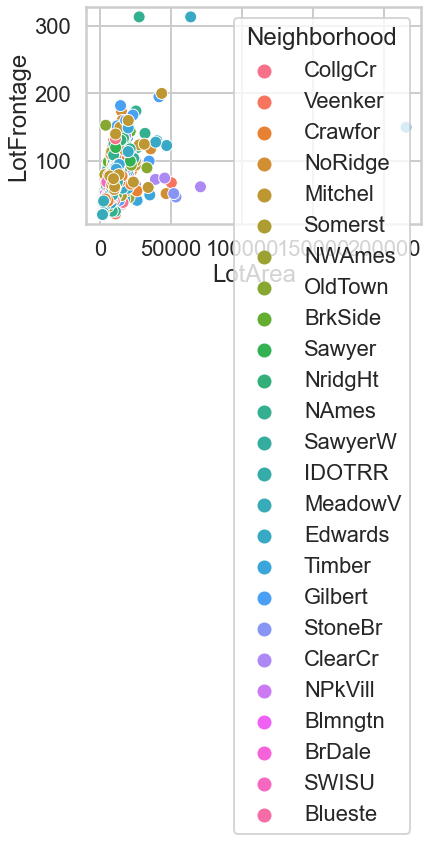

In [238]:
sns.scatterplot(x=df_main['LotArea'],y=df_main['LotFrontage'], hue=df_main['Neighborhood'])

In [239]:
df_main_subset=df_main.loc[df_main['Neighborhood'].isin(['OldTown','Edwards','Mitchel'])]

<AxesSubplot:xlabel='LotArea', ylabel='LotFrontage'>

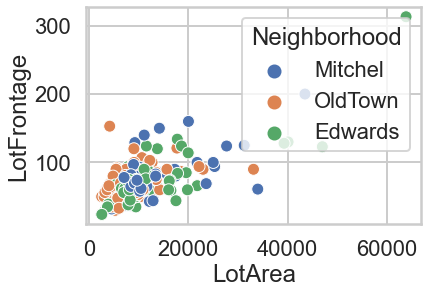

In [240]:
sns.scatterplot(x=df_main_subset['LotArea'],y=df_main_subset['LotFrontage'], hue=df_main_subset['Neighborhood'])

In [241]:
# Though it is not a high correlation but LotFrontage has a positive correlation with LotArea. I will use regression
# to fill in the null values of this one. 

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
testdf = df_main[df_main['LotFrontage'].isnull()==True]
traindf = df_main[df_main['LotFrontage'].isnull()==False]
y = traindf['LotFrontage']
traindf.drop('LotFrontage',axis=1,inplace=True)
lr.fit(traindf[['LotArea']],y)
testdf.drop('LotFrontage',axis=1,inplace=True)
pred = lr.predict(testdf[['LotArea']])
testdf['LotFrontage']= pred



C:\Users\JChen\AppData\Local\Temp/ipykernel_19388/95600844.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf.drop('LotFrontage',axis=1,inplace=True)
C:\Users\JChen\AppData\Local\Temp/ipykernel_19388/95600844.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf.drop('LotFrontage',axis=1,inplace=True)
C:\Users\JChen\AppData\Local\Temp/ipykernel_19388/95600844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [242]:
testdf.shape

(486, 81)

In [243]:
testdf.index

Int64Index([   7,   12,   14,   16,   24,   31,   42,   43,   50,   64,
            ...
            2814, 2815, 2818, 2839, 2845, 2847, 2850, 2900, 2901, 2908],
           dtype='int64', length=486)

In [247]:
df_main.loc[testdf.index,'LotFrontage'] = testdf['LotFrontage']

In [248]:
miss_data_perc = percent_missing(df_main)
miss_data_perc

SalePrice      49.982871
Exterior1st     0.034258
Exterior2nd     0.034258
Electrical      0.034258
KitchenQual     0.034258
GarageCars      0.034258
GarageArea      0.034258
SaleType        0.034258
dtype: float64

In [249]:
df_main['Exterior1st'] = df_main['Exterior1st'].fillna('Other')

df_main['Exterior2nd'] = df_main['Exterior2nd'].fillna('Other')

In [250]:
df_main['GarageCars'].describe()

count    2918.000000
mean        1.766621
std         0.761624
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64

In [251]:
df_main['GarageCars'] = df_main['GarageCars'].fillna(2)

In [252]:
df_main['Electrical'].describe()

count      2918
unique        5
top       SBrkr
freq       2671
Name: Electrical, dtype: object

In [253]:
df_main['Electrical'] = df_main['Electrical'].fillna('SBrkr')

In [254]:
miss_data_perc = percent_missing(df_main)
miss_data_perc

SalePrice      49.982871
KitchenQual     0.034258
GarageArea      0.034258
SaleType        0.034258
dtype: float64

In [255]:
df_main['GarageArea'].describe()

count    2918.000000
mean      472.874572
std       215.394815
min         0.000000
25%       320.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64

In [256]:
df_main['GarageArea'] = df_main['GarageArea'].fillna(472)

In [257]:
df_main['KitchenQual'].describe()

count     2918
unique       4
top         TA
freq      1492
Name: KitchenQual, dtype: object

In [258]:
df_main['KitchenQual'] = df_main['KitchenQual'].fillna("TA")

In [259]:
df_main['SaleType'].describe()

count     2918
unique       9
top         WD
freq      2525
Name: SaleType, dtype: object

In [260]:
df_main['SaleType'] = df_main['SaleType'].fillna("WD")

In [261]:
miss_data_perc = percent_missing(df_main)
miss_data_perc

SalePrice    49.982871
dtype: float64

To summary, all the missing values are dealt with using different methods. There are three major types of methods to fill in those values. 1) Missing values indicate absence of corresponding features such as certain houses do not have basement. In those cases, the values are filled with "None" for categorical features, and "0" for numerical features. 2) There are missing values for certain features but confirmed by knowledge or other features that those should have a value. Many of these are filled by mode or mean. 3) Similar to 2) but filled with a linear regression using other features. For example, I assume "LotFrontage" is a dependent of "LotArea", and filled "LotFrontage" values with a linear relationship to "LotArea". 

## 3. Modelling 
